In [5]:
import numpy as np
import tensorflow as tf
import networkx as nx
import collections
import matplotlib.pyplot as plt

#weights = np.loadtxt("weights_tract.txt") #structural
#length_matrix = np.loadtxt("lengths_tract.txt")
#connections = np.loadtxt("weights_surf.txt")
#averages = np.loadtxt("Experiment3/averages.txt")
weights = np.loadtxt("weights_tract.txt") #structural
length_matrix = np.loadtxt("lengths_tract.txt")
connections = np.loadtxt("weights_surf.txt")
averages = np.loadtxt("Experiment3/averages.txt")



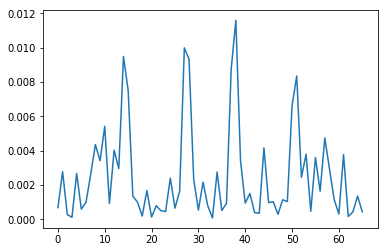

In [7]:
from numpy import linalg as LA

w,v = LA.eig(weights)
vol_norm = weights/w[0]

w2,v2 = LA.eig(connections)
surf_norm = connections/w2[0]
errors = []
for i in range(66):
    if i < 33:
        mean_squared_error = (np.square(vol_norm[i][:33] - surf_norm[i][:33])).mean(axis = None)
        errors.append(mean_squared_error)
    else:
        mean_squared_error = (np.square(vol_norm[i][33:] - surf_norm[i][33:])).mean(axis = None)
        errors.append(mean_squared_error)

plt.plot(errors)





In [9]:
surf_norm[14,15]

0.6519532179977964

In [8]:
np.savetxt("NormalSUFVOL.txt", errors)

In [10]:
vol_norm[14,15]

0.2311904267112618

In [2]:
#from matricies import connections, weights

In [3]:
#all_rest = np.loadtxt("all_rest.txt", float, delimiter = ",")

In [4]:
#all_task = np.loadtxt("all_task.txt", float, delimiter = " ") #has rest and task. USE THIS
#all_rest.shape

In [5]:
#all_rest = np.reshape(all_rest, (66, 447, 2400))
#all_rest = np.swapaxes(all_rest, 0 , 1)
#plt.imshow(np.corrcoef(all_rest[0,:,:]))

#new_all_rest = all_rest[:, : , :1800]
#print(new_all_rest.shape)
#all_data = np.concatenate((all_task, new_all_rest), axis = 0)
all_data.shape

(894, 66, 1800)

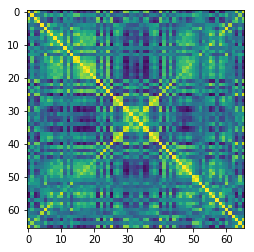

In [6]:
#all_task = np.reshape(all_task, (66, 447, 1800))
#all_task = np.swapaxes(all_task, 0 , 1)
plt.imshow(np.corrcoef(all_task[0,:,:]))

In [7]:
lengths = tf.constant(length_matrix, dtype = "float")

In [8]:
np.max(length_matrix)

length_mod = np.reshape([x if x != 0 else 250 for x in length_matrix.flatten() ], (66,66))



In [9]:
from random import randint 
def sample(all_scans):
    number = randint(0, np.shape(all_scans)[0] - 1) # change for new data set
    return all_scans[number], number

In [14]:
averages = np.loadtxt("Experiment3/averages.txt")


[[1.         0.15848765]
 [0.15848765 1.        ]]


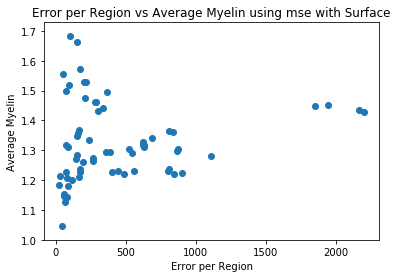

In [44]:
from rsq import myrsq
def generate_errors_and_correlation(matrix, rsq = False):
    correlation = []
    errors = []
    #matrix = weights
    for i in range(66):
        if i < 33:
            #correlation.append(np.corrcoef(connections[i][33:].flatten(), my_weights[i][33:])[0,1])
            #mean_squared_error = (np.square(connections[i][33:] - my_weights[i][33:])).mean(axis = None)
            #errors.append(mean_squared_error)

            correlation.append(np.corrcoef(matrix[i][:33].flatten(), connections[i][:33])[0,1])
            
            if rsq:
                errors.append(myrsq(matrix[i][:33], connections[i][:33]))
            else:
                mean_squared_error = (np.square(matrix[i][:33] - connections[i][:33])).mean(axis = None)
                errors.append(mean_squared_error)
        else:
            #correlation.append(np.corrcoef(connections[i][:33].flatten(), my_weights[i][:33])[0,1])
            #mean_squared_error = (np.square(connections[i][:33] - my_weights[i][:33])).mean(axis = None)
            #errors.append(mean_squared_error)

            correlation.append(np.corrcoef(matrix[i][33:].flatten(), connections[i][33:])[0,1])
            
            if rsq:
                errors.append(myrsq(matrix[i][33:], connections[i][33:]))
            else:
                mean_squared_error = (np.square(matrix[i][33:] - connections[i][33:])).mean(axis = None)
                errors.append(mean_squared_error)
    return errors, correlation
error, correlations = generate_errors_and_correlation(weights, False)
correlations = np.asarray(correlations)
error = np.asarray(error)
plt.scatter(error, averages)
plt.title("Error per Region vs Average Myelin using mse with Surface")
plt.xlabel("Error per Region")
plt.ylabel("Average Myelin")
print(np.corrcoef(error, averages))
plt.show()

In [46]:
np.savetxt("MSEerrorSurVol.txt", error)

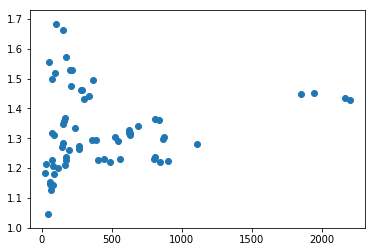

In [17]:
regions = {"ENT": "Entorhinal Cortex", "PARH": "Parahippocampal Cortex", "TP": "Temporal Pole", "FP": "Frontal Pole", 
           "FUS": "Fusiform Gyrus", "TT": "Transverse Temporal Cortex", "LOCC": "Laterial Occipital Cortex", 
           "SP": "Superior-Parietal Cortex", "IT":"Inferior Temporal Cortex", "IP": "Inferior-Pareietal Cortex",
           "SMAR": "Supramarginal Gyrus", "BTST": "Bank of the Superior Temporal Sulcus", "MT": "Middle Temporal Cortex",
           "ST": "Superior Temporal Cortex", "PSTC":"Postcentral Gyrus", "PREC": "Precentral Gyrus", "CMF": "Caudal Middle Frontal Cortex", 
           "POPE": "Pars Apercularis", "PTRI": "Par Triangularis", "RMF": "Roastral Middle Frontal Cortex", 
           "PORB": "Pars Orbitalis", "LOF": "Laterial Oribitofrontal Cortex", "CAC": "Caudal Anterior Cingulate Cortex", 
           "RAC": "Rostral Anterior Cingulate Cortex", "SF": "Superior Frontal Cortex", "MOF": "Medial Orbitofrontal Cortex", 
           "LING": "Lingual Gyrus", "PCAL": "Pericalcarine Cortex", "CUN": "Cuneus", "PARC": "Paracentral Lobule", "ISTC": "Isthmus of the Cinguate Cortex",
           "PCUM": "Precuneus", "PC": "Posterior Cingualate Cortex"}
values = list(regions.values())
keys = list(regions.keys())
plt.scatter(error, averages)
